Distribution comparison tests: non-parametric

#### Nonparametric tests

If visual inspection of the data (potentially in combination with the Shapiro-Wilk test) show that the data is meaningfully non-normal (remember, perfect normality is only possible in theory), then statistics that assume normality (linear regression, t-tests, ANOVA, correlations, and others) will give results that are biased or just straight-up wrong.  Fortunately, there are nonparametric versions of all common statistical methods.  Nonparametric methods are less powerful (given the same sample size, a parametric test will be able to detect smaller trends in the data), which is why they are not used all the time.  

Generally speaking, a nonparametric test works by first converting variable values into rankings, from the lowest value (1st place) to the highest value (last place).  Here is an example of a “height in inches” variable in its original scale, and when converted into ranks:

|Height|Height|
|---|
|Inches		|Ranks|
|	60	|	4|
|	57	|	3|
|	72	|	7|
|	55	|	2|
|	51	|	1|
|	66	|	5|
|	69	|	6|

Once the variable values are converted into ranks, statistical tests are performed on the ranks. 


#### Thinking Like a Data Scientist

Even if your data pass inspection for normality, it may still make sense to use nonparametric statistics if your research question is focused on the median (dividing the sample into equally-sized halves) rather than the mean.  

For an example, let's explore the height of roller coasters across three continents.  We've randomly sampled 20 roller coasters from Europe, Latin America, and North America, to determine which continent has the highest roller coasters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

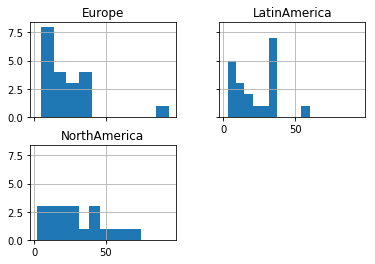

In [2]:
# First, create and load some coaster height data.
roller_coasters = pd.DataFrame()

europe_heights = [
    13.5, 36, 94, 6.1, 22, 35.5, 35.5, 8, 8, 10, 8.5, 5, 30, 31, 4.5, 15, 36,
    20, 10, 30.4
    ]
latin_america_heights = [
    33.3, 35.5, 30, 32, 8.5, 60, 8, 33, 33.1, 13, 8, 22.9, 3.3, 11, 11, 19.5,
    35.1, 19.5, 4, 35.5
    ]
north_america_heights = [
    66.4, 23.7, 54.5, 22.2, 20, 1.8, 3.9, 35.3, 45.2, 51.2, 43.5, 24.3, 74.6,
    14.3, 16.1, 4.8, 38.9, 30.8, 10, 20
    ]

roller_coasters['Europe'] = europe_heights
roller_coasters['LatinAmerica'] = latin_america_heights
roller_coasters['NorthAmerica'] = north_america_heights

# Visualize our data.
roller_coasters.hist(sharey=True, sharex=True)
plt.show()


The data look very non-normal, and they don't resemble any other distribution we've seen.  The histograms are enough to choose nonparametric statistics, so let's go ahead.

#### Kruskal-Wallace Test

The Kruskal-Wallace test works for two or more groups.  While this test is a bit complicated, the underlying logic is the same as the one-way ANOVA we covered earlier.  First, we compute an estimate of the size of the differences between the groups, then we put that difference into context by dividing it by the amount of variance in the groups.

\begin{equation}
H=(N-1)\frac{\sum_{i=1}^gn_i(\bar{r}_i-\bar{r})^2}{\sum_{i=1}^g\sum_{j=1}^{n_i}(r_{ij}-\bar{r})^2}
\end{equation}

*H* is the test statistic.  
$n_i$ is the number of datapoints in group *i*.   
$r_{ij}$ is the rank of datapoint *j* in group *i* when ranked among all datapoints in all groups.  
*N* is the total number of datapoints.  
$\bar{r}_i$ is the average rank of all datapoints in group *i*.  
$\bar{r}$ is the average of all the ranks, and can be calculated as $\frac12(N+1)$.  


In words, this test works by first converting all the data into ranks from 1 (highest value) to N (lowest).  Then the overall average rank $\bar{r}$ is subtracted from the average rank for each group $\bar{r}_i$.  For each group, the difference is squared, then multiplied by the size of the group $n_i$ .  Finally, the scaled squared differences are summed to create the numerator.  This provides information on how different the mean ranks for each group are from one another.

Then, for each observation within a group, the average overall rank $\bar{r}$ is subtracted from the rank of each observation $r_{ij}$ .  This difference is squared and summed.  Finally, the group-level sums are added together to create the denominator.  This tells us how much variability there is within each group, which is then pooled to create an estimate of the variance of the sample.

The test statistic *H* represents the ratio of the divergence of each group mean rank from the overall mean rank relative to the variance in ranks within each group, multiplied by the size of the sample *N*-1.  The larger the value of H, the more likely it is that one of the groups differs meaningfully from the others in the population.

Let's try it with the roller coaster height data.


In [3]:
# Kruskal-Wallace Test

# Join all ratings together into a list, then ranking them.
ranks = stats.rankdata(
    roller_coasters['Europe'].tolist() +
    roller_coasters['LatinAmerica'].tolist() +
    roller_coasters['NorthAmerica'].tolist())

# Add the new ranked variables to the data frame.
roller_coasters['Ranks_Europe'] = ranks[0:20]
roller_coasters['Ranks_LatinAmerica'] = ranks[20:40]
roller_coasters['Ranks_NorthAmerica'] = ranks[40:60]

# Average rank per group.
groups = ['Ranks_Europe', 'Ranks_LatinAmerica', 'Ranks_NorthAmerica']
print(roller_coasters[groups].apply(np.mean))

# Overall average rank.
print(np.mean(ranks))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
stats.kruskal(
    roller_coasters['Europe'],
    roller_coasters['LatinAmerica'],
    roller_coasters['NorthAmerica'])

Ranks_Europe          27.8
Ranks_LatinAmerica    28.9
Ranks_NorthAmerica    34.8
dtype: float64
30.5


KruskalResult(statistic=1.8600661901716153, pvalue=0.39454065279877265)

It appears that the groups do not differ significantly.  The test says there is a 39.5% chance of getting our data if there were no systematic difference between Europe, Latin America, and North America in the population.  Based on our data, roller coaster height doesn't seem to differ systematically across the three continents.

#### Summary

Ultimately, most parametric and non-parametric tests use the same logic when comparing groups: compute a descriptive statistic for the central tendency of each group, compute the size of the difference between groups, compute the amount of variance in the data, and put the size of the difference in context by calculating a ratio of difference to variance.

Parametric and non-parametric tests differ in which measures of central tendency and variance they use.  Non-parametric tests are less powerful than their parametric counterparts.  This is because before non-parametric tests can be run, the data is converted into a new form (turned into ranks, or binarized into above-the-median and below-the-median categories, for example) that contains less information than the original.  When continuous data is converted into ranks, we lose information about the size of the difference between two adjacent datapoints.  When continuous data is converted into binary categories, we lose information about the relative sizes of the datapoints.  This loss of information is why nonparametric statistics are less sensitive, but it is also why they are more robust against issues such as extreme values.

### Challenge!

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.



### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [4]:
# First, create and load some coaster height data.


df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")

for col in df.columns: 
    print(col)
    
    




cntry
idno
year
tvtot
ppltrst
pplfair
pplhlp
happy
sclmeet
sclact
gndr
agea
partner


In [5]:
trust_df = df[['ppltrst', 'year', 'cntry']]
trust_df.head(100)

,ppltrst,year,cntry
0,3.0,6,CH
1,5.0,6,CH
2,8.0,6,CH
3,6.0,6,CH
4,6.0,6,CH
...,...,...,...
95,8.0,6,CH
96,6.0,6,CH
97,8.0,6,CH
98,5.0,6,CH


In [6]:
print(stats.ttest_ind(trust_df['ppltrst'], trust_df['year']))


Ttest_indResult(statistic=nan, pvalue=nan)


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

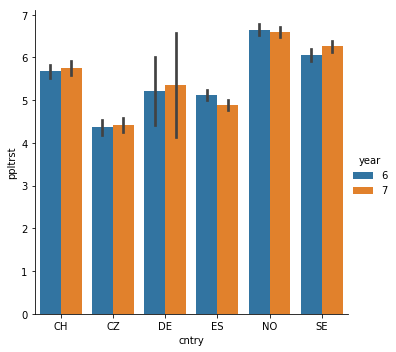

In [7]:

# Visualize our data.


import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
sns.factorplot(x = 'cntry', y='ppltrst', hue = 'year', data=trust_df, kind='bar')
plt.show()


### For most countries, trust increased between 2012 and 2014 with the exception of Spain and Norway. I wonder why! 

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [9]:
happy_df = df[['gndr', 'year', 'cntry']]
happy_df.head(100)

,happy,year,cntry
0,8.0,6,CH
1,9.0,6,CH
2,7.0,6,CH
3,10.0,6,CH
4,8.0,6,CH
...,...,...,...
95,7.0,6,CH
96,8.0,6,CH
97,10.0,6,CH
98,8.0,6,CH


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

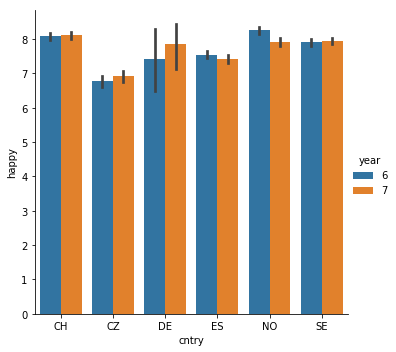

In [11]:
# Visualize our data.


import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
sns.factorplot(x = 'cntry', y='happy', hue = 'year', data=happy_df, kind='bar')
plt.show()


### For most countries, happiness increased between 2012 and 2014 with the exception of Spain and Norway again! I wonder why...

### 3. Who reported watching more TV in 2012, men or women?


In [14]:
tv_df = df[['tvtot', 'year', 'gndr']]
tv_df.head(100)

,tvtot,year,gndr
0,3.0,6,2.0
1,6.0,6,2.0
2,1.0,6,1.0
3,4.0,6,2.0
4,5.0,6,2.0
...,...,...,...
95,3.0,6,1.0
96,3.0,6,1.0
97,0.0,6,2.0
98,2.0,6,1.0


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

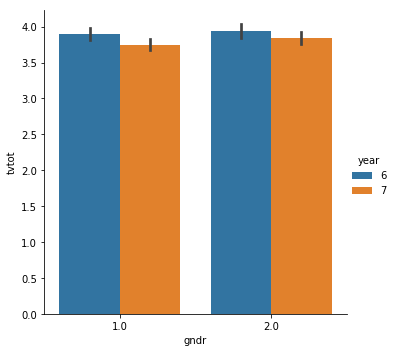

In [15]:
# Visualize our data.


import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
sns.factorplot(x = 'gndr', y='tvtot', hue = 'year', data=tv_df, kind='bar')
plt.show()

1 is male. 2 is female.

### Both watched more TV in 2012. TV consumption or both sexes went down in 2014

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [16]:
fair_df = df[['pplfair', 'year', 'partner']]
fair_df.head(100)

,pplfair,year,partner
0,10.0,6,1.0
1,7.0,6,1.0
2,8.0,6,2.0
3,6.0,6,1.0
4,7.0,6,1.0
...,...,...,...
95,5.0,6,1.0
96,7.0,6,2.0
97,8.0,6,1.0
98,3.0,6,2.0


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

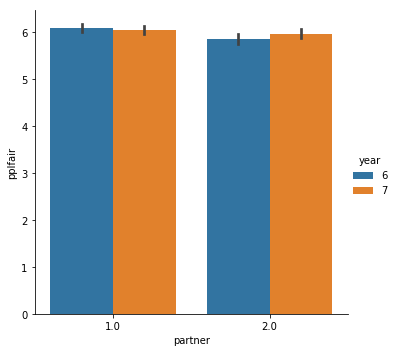

In [18]:
# Visualize our data.


import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
sns.factorplot(x = 'partner', y='pplfair', hue = 'year', data=fair_df, kind='bar')
plt.show()

1 Lives with husband/wife/partner at household grid

2 Does not

### People with a partner were more likely to believe people were fair in 2012

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [19]:
social_df = df[['sclmeet', 'year', 'cntry']]
social_df.head(100)

,sclmeet,year,cntry
0,5.0,6,CH
1,3.0,6,CH
2,6.0,6,CH
3,6.0,6,CH
4,7.0,6,CH
...,...,...,...
95,6.0,6,CH
96,6.0,6,CH
97,5.0,6,CH
98,6.0,6,CH


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

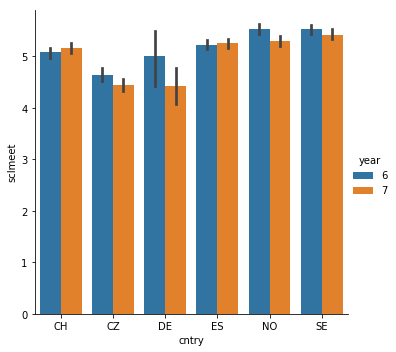

In [21]:
# Visualize our data.


import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
sns.factorplot(x = 'cntry', y='sclmeet', hue = 'year', data=social_df, kind='bar')
plt.show()


### Germany met the least, followed by Czech Rep. The most social was Spain.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [24]:
social2_df = df[['sclact', 'year', 'cntry']]
social2_df.head(100)

,sclact,year,cntry
0,4.0,6,CH
1,2.0,6,CH
2,3.0,6,CH
3,2.0,6,CH
4,2.0,6,CH
...,...,...,...
95,2.0,6,CH
96,3.0,6,CH
97,3.0,6,CH
98,3.0,6,CH


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

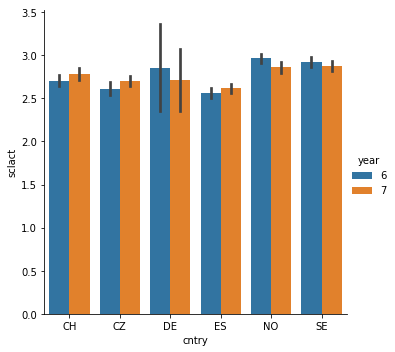

In [25]:
# Visualize our data.


import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
sns.factorplot(x = 'cntry', y='sclact', hue = 'year', data=social2_df, kind='bar')
plt.show()


In [ ]:
### Oddly, Spain our previously most social country from our last question would suggest that perhaps its mostly younger people meeting. This is also the case with the Czech republic. Norway and Sweden were actually the most social relative to others their own age. 